In [1]:
import cv2
import numpy as np
from skimage.measure import compare_ssim, compare_psnr
import imutils
import matplotlib.pyplot as plt
from PIL import Image
import glob
from skimage.filters import roberts, sobel
from skimage import measure

%matplotlib inline

## Functions

In [2]:
def read_images(path1, path2):
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return img1, img2, gray1, gray2

def display_images(img_a, img_b):
    plt.figure(figsize=(12,14))
    plt.subplot(121),plt.imshow(img_a)
    plt.title('Before Disaster Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_b)
    plt.title('After Disaster Image'), plt.xticks([]), plt.yticks([])
    plt.show()

def display_gray(img_a, img_b):
    plt.figure(figsize=(12,14))
    plt.subplot(121),plt.imshow(img_a,cmap = 'gray')
    plt.title('Before Disaster Grayscaled Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_b,cmap = 'gray')
    plt.title('After Disaster Grayscaled Image'), plt.xticks([]), plt.yticks([])
    plt.show()

def abs_diff(img_a, img_b, title):    
    diff = cv2.absdiff(img_a, img_b)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    imask =  gray>0
    canvas = np.zeros_like(img_a, np.uint8)
    canvas[imask] = img_b[imask]
    cv2.imwrite(f'../images/Diff_result_images/result_{title}_pair.png', canvas)
    print('Absolute difference image is written to images folder')

def calculate_ssim_psnr(img_a, img_b, gray_a, gray_b, threshold=True):
    (score, diff) = compare_ssim(gray_a, gray_b, multichannel=True, full=True)
    diff = (diff * 255).astype('uint8')
    print(f'SSIM score: {compare_ssim(img_a, img_b, multichannel=True)}')
    print(f'PSNR score: {compare_psnr(img_a, img_b)}')
    if threshold == True:
        thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh_before = cv2.threshold(gray_a, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh_after = cv2.threshold(gray_b, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        print('Created thresh on difference, thresh_before and thresh_after')
        return thresh, thresh_before, thresh_after
    else:
        pass
    

def plot_thresholds(thresh1, thresh2, thresh3):
    fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                           figsize=(12, 10))
    ax[0].imshow(thresh1, cmap=plt.cm.gray)
    ax[0].set_title('Difference between Images Threshold')
    ax[1].imshow(thresh2, cmap=plt.cm.gray)
    ax[1].set_title('Before Image Threshold')
    ax[2].imshow(thresh3, cmap=plt.cm.gray)
    ax[2].set_title('After Image Threshold')
    for a in ax:
        a.axis('off')
    plt.tight_layout()
    plt.xticks([]), plt.yticks([])
    plt.show()

def plot_edges(img_a, img_b):
    edge_roberts = roberts(img_a)
    edge_sobel = sobel(img_b)
    fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                           figsize=(12, 10))

    ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
    ax[0].set_title('Roberts Edge Detection')
    ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
    ax[1].set_title('Sobel Edge Detection')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()
    

def draw_bounding_boxes(img_a, img_b):
    thresh_before = cv2.threshold(img_a, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    thresh_after = cv2.threshold(img_b, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours_before = measure.find_contours(thresh_before, 0.8)
    contours_after = measure.find_contours(thresh_after, .8)
    # Display the image and plot all contours found
    fig, (axleft, axright) = plt.subplots(figsize=(20,18), nrows=2)
    plt.title('Contours before and after disaster', loc='center')
    axleft.imshow(img_a, cmap=plt.cm.gray)
    axright.imshow(img_b, cmap=plt.cm.gray)

    for (contour_before, contour_after) in zip(contours_before, contours_after):
        axleft.plot(contour_before[:, 1], contour_before[:, 0], linewidth=1, color='b')
        axright.plot(contour_after[:, 1], contour_after[:, 0], linewidth=1, color='r')
    axleft.set_xticks([])
    axleft.set_yticks([])
    axright.set_xticks([])
    axright.set_yticks([])
     
    
def write_images(img_a, img_b, img_diff, img_thresh, name):
    cv2.imwrite(f'../images/Diff_result_images/Original_{name}_pair.jpg', img0)
    cv2.imwrite(f'../images/Diff_result_images/Modified_{name}_pair.jpg', img1)
    cv2.imwrite(f'../images/Diff_result_images/Difference_{name}_pair.jpg', diff)
    cv2.imwrite(f'../images/Diff_result_images/Thresh_{name}_pair.jpg', thresh)

## Wildfire in California

In [3]:
img1, img2, gray1, gray2 = read_images('../images/Outputimages/cropped6.jpg', '../images/Outputimages/cropped7.jpg')

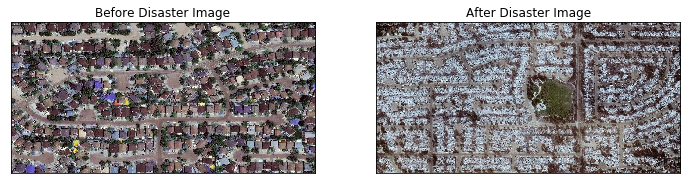

In [4]:
display_images(img1, img2)

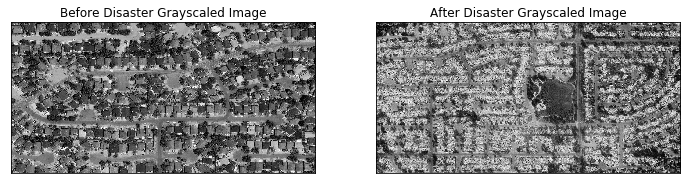

In [5]:
display_gray(gray1, gray2)

In [6]:
abs_diff(img1, img2, 'wildfire_ca_img_difference')

Absolute difference image is written to images folder


In [7]:
print(gray1.shape)
print(gray2.shape)

(345, 695)
(345, 695)


In [8]:
compare_ssim(gray1, gray2, multichannel=True)

0.03343321624389218

In [9]:
thresh, thresh_before, thresh_after = calculate_ssim_psnr(img1, img2, gray1, gray2)

SSIM score: 0.02000760319798472
PSNR score: 10.385186392719287
Created thresh on difference, thresh_before and thresh_after


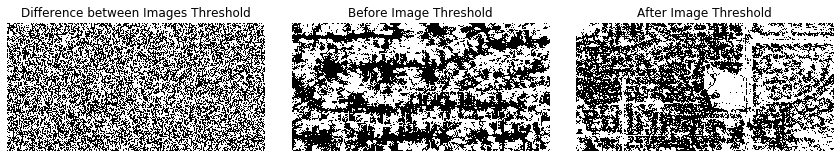

In [10]:
plot_thresholds(thresh, thresh_before, thresh_after)

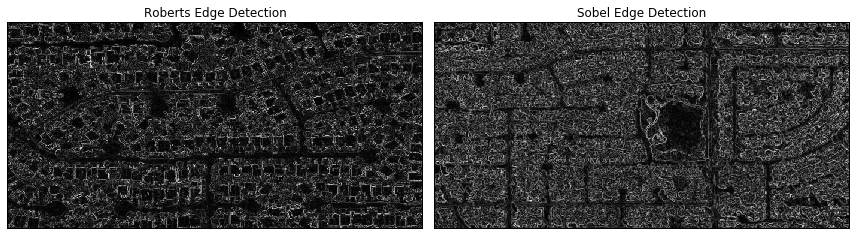

In [11]:
plot_edges(gray1, gray2)

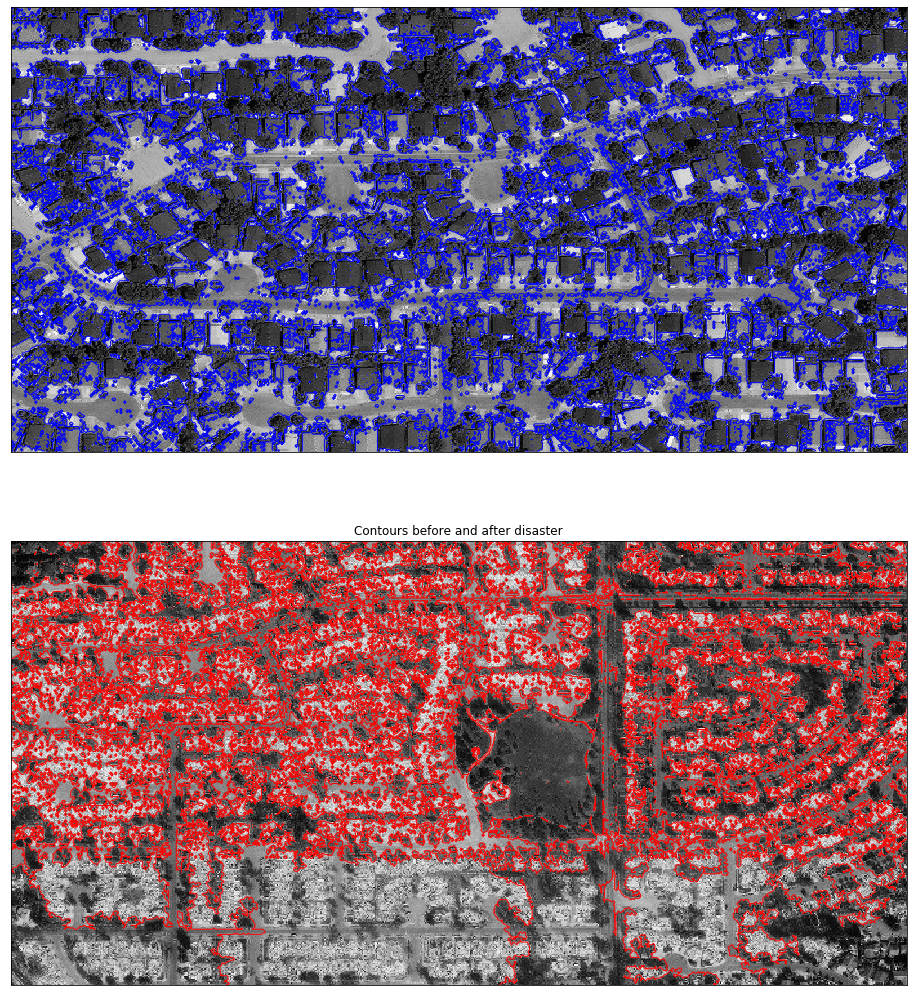

In [146]:
draw_bounding_boxes(gray1, gray2)

### Hurricane Harvey

In [12]:
img3, img4, gray3, gray4 = read_images('../images/Outputimages/cropped0.jpg', '../images/Outputimages/cropped1.jpg')

In [13]:
abs_diff(img3, img4, 'Hurricane Harvey Texas')

Absolute difference image is written to images folder


In [14]:
thresh3, thresh4, thresh5 = calculate_ssim_psnr(img3, img4, gray3, gray4)

SSIM score: 0.5817946395262337
PSNR score: 18.367594238074958
Created thresh on difference, thresh_before and thresh_after


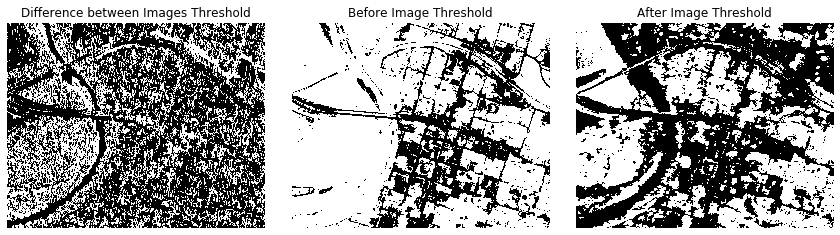

In [15]:
plot_thresholds(thresh3, thresh4, thresh5)

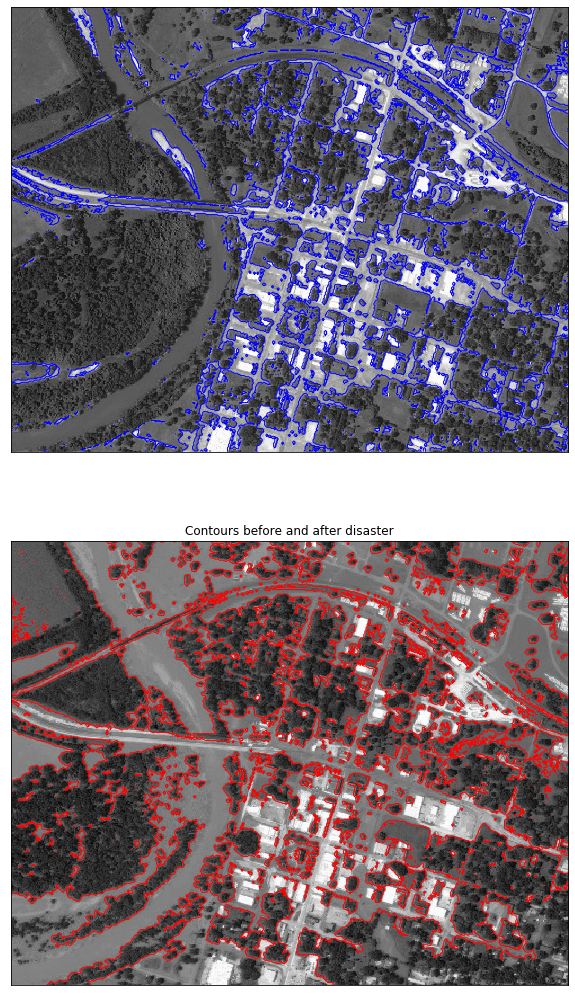

In [152]:
draw_bounding_boxes(gray3, gray4)

## Tornado Joplin

In [16]:
img5, img6, gray5, gray6 = read_images('../images/Outputimages/cropped4.jpg', '../images/Outputimages/cropped5.jpg')

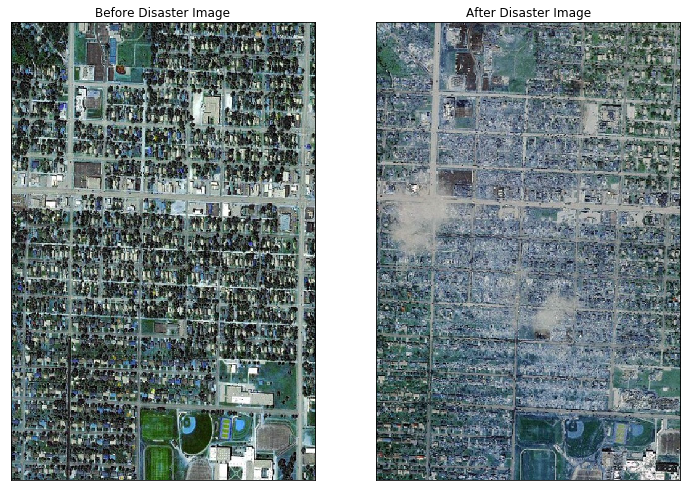

In [17]:
display_images(img5, img6)

In [19]:
abs_diff(img5, img6, 'Tornado Joplin')

Absolute difference image is written to images folder


In [20]:
thresh6, thresh7, thresh8 = calculate_ssim_psnr(img5, img6, gray5, gray6)

SSIM score: 0.031098832840474617
PSNR score: 11.62276102769209
Created thresh on difference, thresh_before and thresh_after


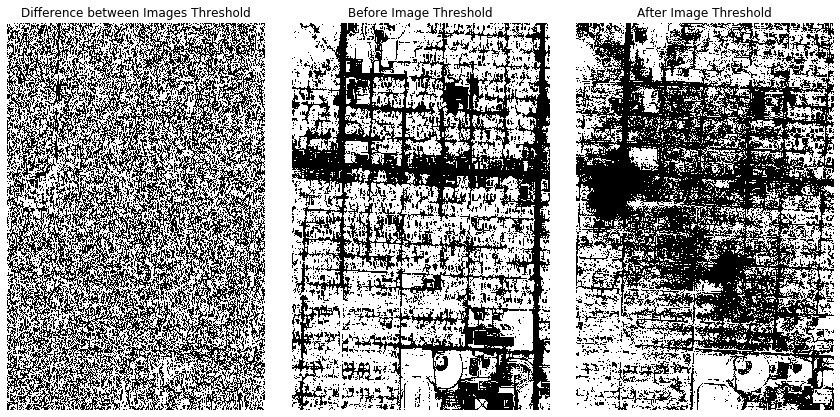

In [21]:
plot_thresholds(thresh6, thresh7, thresh8)

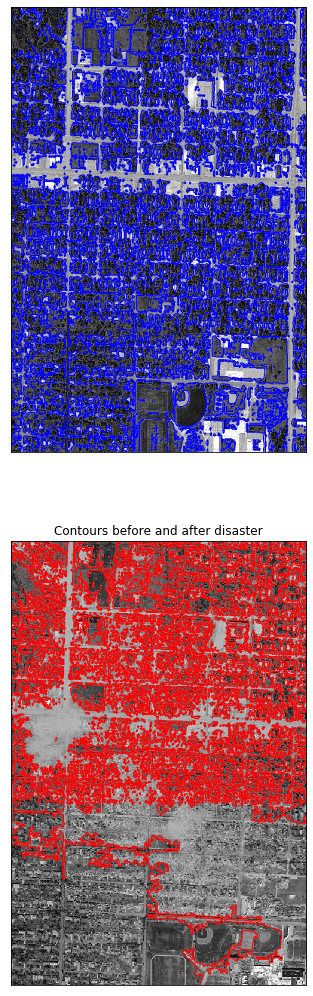

In [24]:
draw_bounding_boxes(gray5, gray6)

## Hurricane Harvey Freeport

In [25]:
img7, img8, gray7, gray8 = read_images('../images/Outputimages/cropped2.jpg', '../images/Outputimages/cropped3.jpg')

In [26]:
abs_diff(img7, img8, 'Hurricane Harvey Freeport')

Absolute difference image is written to images folder


In [27]:
thresh9, thresh10, thresh11 = calculate_ssim_psnr(img7, img8, gray7, gray8)

SSIM score: 0.08580629736457646
PSNR score: 12.10462514234032
Created thresh on difference, thresh_before and thresh_after


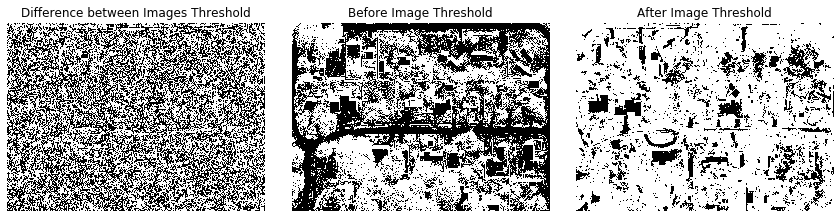

In [28]:
plot_thresholds(thresh9, thresh10, thresh11)

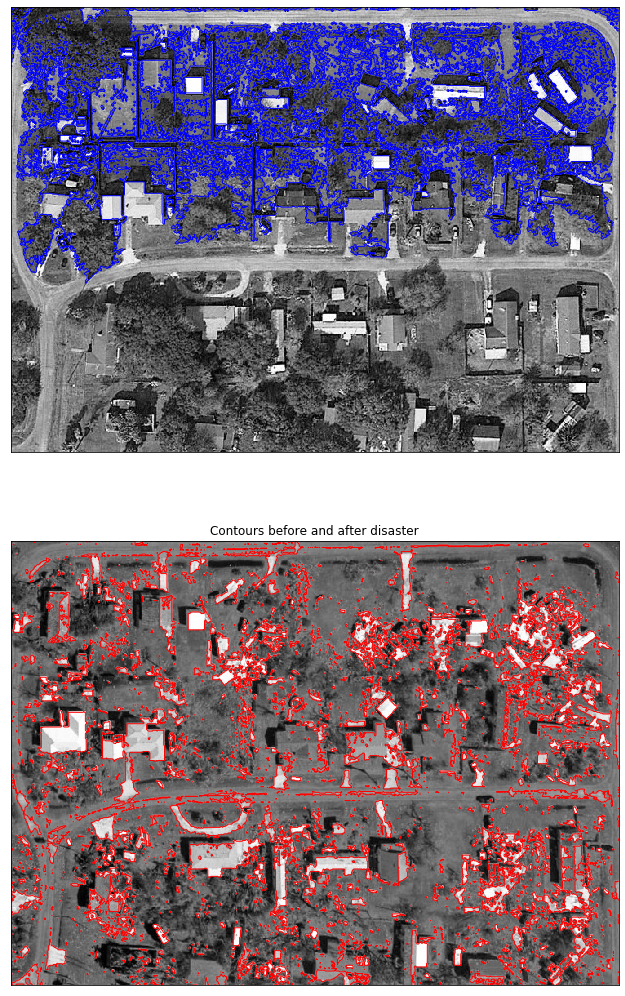

In [29]:
draw_bounding_boxes(gray7, gray8)